In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn import preprocessing
dtype = torch.float64
device = torch.device("cuda:0")
torch.manual_seed(42)
data = pd.read_csv("NN_training.nn")
np.random.seed(42)

In [2]:
data = data.set_index("Unnamed: 0")
data.shape

(9331, 522)

In [3]:
data.dropna().shape

(9331, 522)

In [4]:
data["Actual Velocity"].isna().sum()

0

In [5]:
data.iloc[0,0]

24.0

In [6]:
data.head()

,Actual Velocity,Track Section,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,...,2500_y,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,24.0,0.0,0.002890,0.002176,0.004270,0.007065,0.009169,0.008229,0.006080,0.010589,...,0.001342,0.001679,0.001001,0.001741,0.001173,0.001034,0.441387,0.353673,1.135934,6.148501
2,25.0,0.0,0.006483,0.012145,0.016721,0.014323,0.019283,0.015196,0.018086,0.011794,...,0.001500,0.001161,0.001255,0.001117,0.000859,0.001176,0.435271,0.328850,1.205422,6.901017
5,25.0,2580.0,0.006075,0.026636,0.049570,0.035475,0.045464,0.058989,0.035533,0.054188,...,0.001636,0.000910,0.001677,0.001872,0.001693,0.001617,0.492657,0.398906,1.274077,2.885397
6,25.0,2580.0,0.006267,0.005948,0.009482,0.013067,0.011271,0.009465,0.012031,0.016119,...,0.001607,0.001065,0.001259,0.001687,0.001401,0.001769,0.452549,0.330364,1.290717,3.406660
7,24.0,2580.0,0.006267,0.005948,0.009482,0.013067,0.011271,0.009465,0.012031,0.016119,...,0.001607,0.001065,0.001259,0.001687,0.001401,0.001769,0.452549,0.330364,1.290717,3.406660


In [7]:
x = data.iloc[:,2:].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
d2 = pd.DataFrame(x_scaled)
d2["speed"] = data.iloc[:,0]
d2["position"] = data.iloc[:,1]
train, validate, test = np.split(d2.sample(frac=1), [int(.6*len(d2)), int(.8*len(d2))])

In [8]:
d2.head()

,0,1,2,3,4,5,6,7,8,9,...,514,515,516,517,518,519,520,521,speed,position
0,0.296296,0.000000,0.012672,0.010053,0.022331,0.039810,0.067267,0.061797,0.045089,0.056358,...,0.037567,0.082659,0.053812,0.039585,0.056502,0.060794,0.052717,0.021361,24.0,0.0
1,0.308642,0.000000,0.032173,0.059526,0.089143,0.081217,0.142102,0.114948,0.134987,0.062800,...,0.047197,0.052917,0.039308,0.045075,0.055713,0.056493,0.055965,0.023981,NaN,NaN
2,0.308642,0.580558,0.029955,0.131441,0.265416,0.201901,0.335824,0.449037,0.265629,0.289605,...,0.063182,0.088886,0.077823,0.062092,0.063115,0.068633,0.059175,0.009997,25.0,0.0
3,0.308642,0.580558,0.030999,0.028773,0.050298,0.074051,0.082824,0.071224,0.089650,0.085941,...,0.047350,0.080089,0.064348,0.067926,0.057942,0.056755,0.059953,0.011812,NaN,NaN
4,0.296296,0.580558,0.030999,0.028773,0.050298,0.074051,0.082824,0.071224,0.089650,0.085941,...,0.047350,0.080089,0.064348,0.067926,0.057942,0.056755,0.059953,0.011812,NaN,NaN


In [9]:
x_scaled[0,:]

array([0.2962963 , 0.        , 0.01267242, 0.01005332, 0.02233109,
       0.03981009, 0.06726672, 0.06179678, 0.04508938, 0.05635821,
       0.10375106, 0.13456194, 0.14023017, 0.18479218, 0.16986342,
       0.286599  , 0.14427274, 0.17469264, 0.26310061, 0.16540796,
       0.09204636, 0.08019606, 0.07367775, 0.04049933, 0.05694063,
       0.05128955, 0.13183701, 0.09957645, 0.06947675, 0.09277417,
       0.08115094, 0.05998524, 0.06169809, 0.03805582, 0.04744997,
       0.05848697, 0.06124184, 0.03764432, 0.02545195, 0.03795332,
       0.04650699, 0.01825841, 0.06049976, 0.03327567, 0.02192893,
       0.01987099, 0.01676501, 0.03444323, 0.02058551, 0.00977345,
       0.01490439, 0.02453682, 0.01413714, 0.02002122, 0.02363129,
       0.04019039, 0.02550453, 0.03482801, 0.01738612, 0.02372306,
       0.01319014, 0.0168854 , 0.02082492, 0.02246789, 0.02904975,
       0.02387394, 0.01718946, 0.02788139, 0.02696037, 0.01976725,
       0.0242053 , 0.02024602, 0.01015246, 0.01493769, 0.01484

In [10]:
y_tr = torch.from_numpy(train.iloc[:,0].to_numpy())
y_tr = y_tr.view(y_tr.shape[0], 1)
y_te = torch.from_numpy(test.iloc[:,0].to_numpy())
y_te = y_te.view(y_te.shape[0], 1)
y_va = torch.from_numpy(validate.iloc[:,0].to_numpy())
y_va = y_va.view(y_va.shape[0], 1)

In [11]:
x_tr = torch.from_numpy(train.iloc[:,1:].to_numpy())
x_te = torch.from_numpy(test.iloc[:,1:].to_numpy())
x_va = torch.from_numpy(validate.iloc[:,1:].to_numpy())

In [12]:
print(x_tr.shape, y_tr.shape)

torch.Size([5598, 523]) torch.Size([5598, 1])


In [13]:
x_tr = x_tr.float()
y_tr = y_tr.float()

In [14]:
x_tr = x_tr.cuda()
y_tr = y_tr.cuda()

In [15]:
x_te = x_te.float().cuda()
y_te = y_te.float().cuda()

In [16]:
x_va = x_te.float().cuda()
y_va = y_te.float().cuda()

In [17]:
l_rate = 1e-6

input_dim, hiden_dim, h2, output_dim = x_tr.shape[1], 500, 30, y_tr.shape[1]
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hiden_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(hiden_dim, h2),
    torch.nn.ReLU(),
    torch.nn.Linear(h2, output_dim),
)
model.cuda()
loss_fn = torch.nn.MSELoss(reduction="sum")
losses_train = []
losses_test = []
times = []

In [18]:
l_rate = 1e-4

In [19]:
y_pred = model(x_tr)

In [20]:
y_tr[0]

tensor([0.2840], device='cuda:0')

In [21]:
y_pred[0]

tensor([-17.4904], device='cuda:0', grad_fn=<SelectBackward>)

In [26]:
loss_fn(y_pred, y_tr)

tensor(nan, device='cuda:0', grad_fn=<MseLossBackward>)

In [22]:

for t in range(500):
#     y_pred = model(xc).to(device)
    y_pred = model(x_tr)
    
#     y_c_pred = y_pred.to(dev)
    loss = loss_fn(y_pred, y_tr)
    
    if t % 100 == 1:
        print("{:16}{:6}   {:5.3}".format("training error:", t, loss.item()))
        y_test = model(x_te)
        loss_te = loss_fn(y_test, y_te)
        print("{:16}{:6}  {:5.3}".format("test error:", t, loss_te.item()))
    if t % 100 == 1:
#         print("training error:", t, loss.item())
        y_test = model(x_te)
        loss_te = loss_fn(y_test, y_te)
#         print("test error:", t, loss_te.item())
        losses_train.append(loss.item())
        losses_test.append(loss_te.item())
        times.append(t)
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= l_rate * param.grad

training error:      1     nan
test error:          1    nan
training error:    101     nan
test error:        101    nan
training error:    201     nan
test error:        201    nan
training error:    301     nan
test error:        301    nan
training error:    401     nan
test error:        401    nan


<AxesSubplot:xlabel='time', ylabel='test_l'>

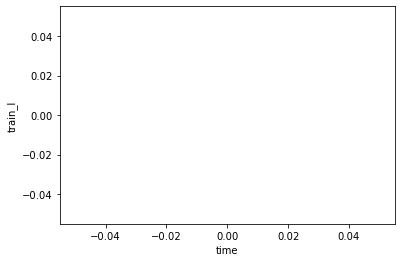

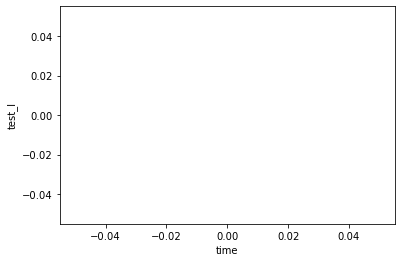

In [23]:
stats = pd.DataFrame({"train_l":losses_train, "test_l":losses_test, "time":times})
# stats.plot(x="time", y=["train_l", "test_l"], kind="scatter")
stats.plot(x="time", y="train_l", kind="scatter")
stats.plot(x="time", y="test_l", kind="scatter")

to do:
    Randomize the order of the input data
    training/test set split
    optimise architecture
    test by plotting predicted speeds of other runs
    investigate 1d convolution layer
    print the validation set score with loss
    
    Build alternate model using raw acceleration data (down sample data) - investigate embedding/embedding layer

In [24]:
# checkpoint = {'input_size': xc.shape[1],
#               'output_size': yc.shape[1],
#               "model_dets": model,
#               'state_dict': model.state_dict()}

# torch.save(checkpoint, 'checkpoint.pth')

In [25]:
model

Sequential(
  (0): Linear(in_features=523, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=30, bias=True)
  (3): ReLU()
  (4): Linear(in_features=30, out_features=1, bias=True)
)